In [0]:
# Import the machine learning libraries.
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.utils import np_utils

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [130]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)

X_train shape: (60000, 28, 28) y_train shape: (60000,)


y = 2 Pullover


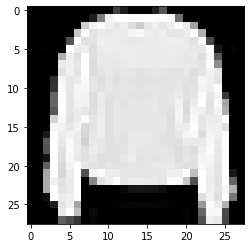

In [131]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

img_index = 7
label_index = y_train[img_index]

print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

plt.imshow(X_train[img_index], cmap=plt.get_cmap('gray'))

In [132]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [133]:
# Reshape
w, h = 28, 28
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


In [134]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)             

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [136]:
# Fit the model
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.5965 - accuracy: 0.7825 - val_loss: 0.3927 - val_accuracy: 0.8607
Epoch 2/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.4076 - accuracy: 0.8528 - val_loss: 0.3314 - val_accuracy: 0.8822
Epoch 3/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.3638 - accuracy: 0.8674 - val_loss: 0.3071 - val_accuracy: 0.8867
Epoch 4/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.3378 - accuracy: 0.8764 - val_loss: 0.2863 - val_accuracy: 0.8939
Epoch 5/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.3172 - accuracy: 0.8838 - val_loss: 0.2825 - val_accuracy: 0.8980
Epoch 6/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.3029 - accuracy: 0.8892 - val_loss: 0.2642 - val_accuracy: 0.9052
Epoch 7/10
60000/60000 [==============================] - 73s 1ms/st

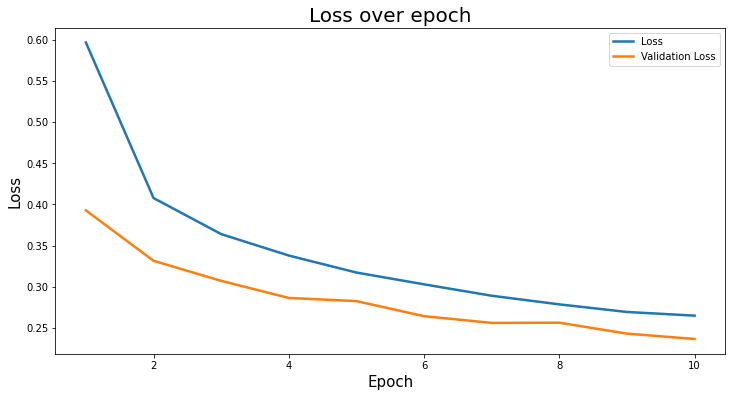

In [137]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(epochs)+1, history.history['loss'], label='Loss', linewidth=2.5)
plt.plot(np.arange(epochs)+1, history.history['val_loss'], label='Validation Loss', linewidth=2.5)
plt.title('Loss over epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()
plt.show()

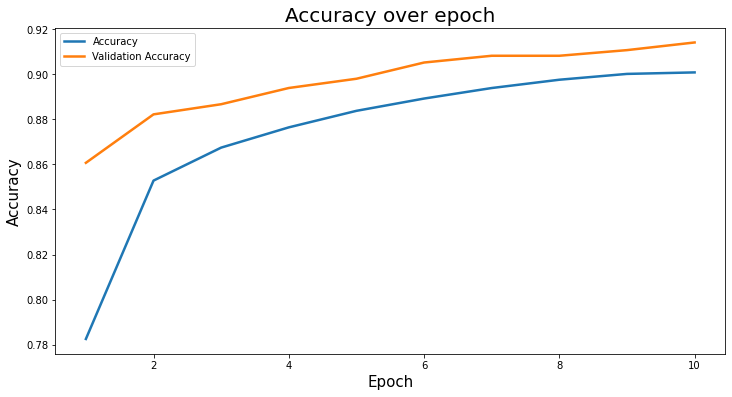

In [138]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(epochs)+1, history.history['accuracy'], label='Accuracy', linewidth=2.5)
plt.plot(np.arange(epochs)+1, history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)
plt.title('Accuracy over epoch', fontsize=20)

plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)

plt.legend()
plt.show()

In [139]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23653673379421233
Test accuracy: 0.9140999913215637


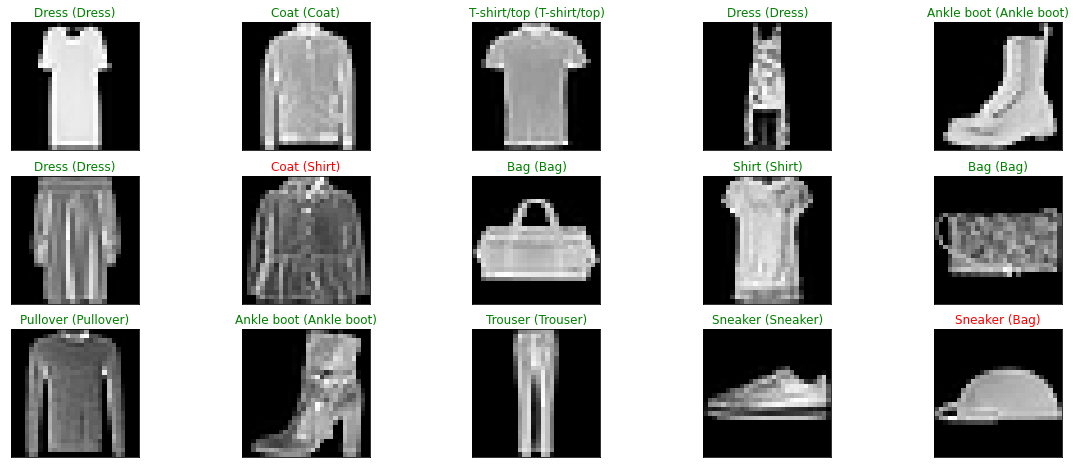

In [140]:
y_pre = model.predict(X_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]), cmap=plt.get_cmap('gray'))
    predict_index = np.argmax(y_pre[index])
    true_index = np.argmax(y_test[index])
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))